In [1]:
import numpy as np
import simtk.unit as unit
import matplotlib.pyplot as plt

# El oscilador armónico y el enlace covalente

Despues de la partícula libre, el modelo de sistema físico más sencillo puede ser el oscilador armónico clásico. Este sistema es muy familiar para cualquiera. Quizás no lo hayas reconocido por los términos 'oscilador armónico clásico', pero no estamos hablando de nada más que de una partícula puntual en un extremo de un muelle ideal clásico. Seguro que ya te acuerdas de la descripción en el contexto de la mecánica clásica newtoniana que podemos hacer de este sistema. Vayamos por partes, veamos en primer lugar el modelo físico del sistema en una dimensión.

## El oscilador armónico simple unidimensional

El sistema del oscilador armónico simple, clásico, no es otra cosa que un objeto de masa $m$ unido al extremo de un muelle ideal. La interacción del muelle sobre nuestro objeto viene descrito por la ley de Hooke que se puede enunciar como: un muelle ideal ejerce una fuerza sobre un cuerpo en su extremo proporcional a su rigidez $k$ y a la distancia que lo separa de su posición de equilibrio.

\begin{equation}
F = -k(x-x_{0})
\end{equation}

Fijaremos en esta discusión, por simplicidad, el origen de coordenadas en la posición de equilibrio del muelle. De tal manera que $x_{0}=0$.

En este caso las ecuaciones de movimiento tienen una solución analítica -que no es posible encontrar para casi cualquier sistema más complicado-:

\begin{equation}
\frac{d^{2} x}{dt^{2}} = -\frac{k}{m}x
\end{equation}

Puedes comprobar, sin más que derivar dos veces, que la trayectoria descrita por la siguiente expresión es solución de la ecuación dinámica anterior:

\begin{equation}
x(t) = A cos(\sqrt{\frac{k}{m}}t+\phi)
\end{equation}

Donde el valor de las constantes $A$ y $\phi$ pueden ser despejadas de las condiciones iniciales:

\begin{equation}
x(0) = A cos(\phi)
\end{equation}

\begin{equation}
v_{x}(0) = -A \sqrt{\frac{k}{m}} sin(\phi)
\end{equation}

Y de esta manera vemos que la frecuencia angular, la frecuencia ordinaria y el periodo de la oscilación vienen determinados por:

\begin{equation}
\omega = \sqrt{\frac{k}{m}}
\end{equation}

\begin{equation}
\nu = \frac{1}{2\pi}\sqrt{\frac{k}{m}}
\end{equation}

\begin{equation}
T = 2\pi\sqrt{\frac{m}{k}}
\end{equation}

Así que para el caso de un sistema con los siguientes parámetros:

In [2]:
# Sistema
mass = 0.2 * unit.kilograms
k = 10.0 * unit.newtons/unit.meter

Podemos calcular el periodo de oscilación:

In [3]:
2*np.pi*np.sqrt(mass/k)

Quantity(value=0.8885765876316734, unit=second)

Veamos ahora, dadas unas condiciones iniciales, qué forma tiene la trayectoria cuya forma analítica conocemos:

In [4]:
# Condiciones iniciales
time_initial = 0.0 * unit.seconds
x_initial = 0.1 * unit.meters
vx_initial = 0.0 * unit.meters/unit.seconds

# Parametros A y phi compatibles con las condiciones iniciales
A = 0.1 * unit.meters
phi = 0.0

# Trajectoria
end_time = 5.0 * unit.seconds
n_steps = 2000
times = np.linspace(time_initial._value, end_time._value, n_steps) * unit.seconds
xs = A*np.cos(np.sqrt(k/mass)*times)
vxs = -A*np.sqrt(k/mass)*np.sin(np.sqrt(k/mass)*times)

En este caso no podemos decir que hayamos simulado la evolución temporal del sistema. No hemos simulado nada. Conocíamos la solución analítica. El comportamiento está resuelto para cualquier circunstancia del sistema y cualquier tiempo. Podemos entonces representar la trayectoria del sistema en función del tiempo:

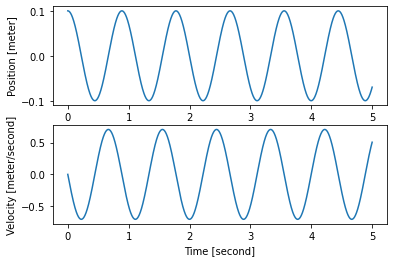

In [5]:
fig, axs = plt.subplots(2)
axs[0].plot(times, xs)
axs[0].set_xlabel('Time [{}]'.format(times.unit))
axs[0].set_ylabel('Position [{}]'.format(xs.unit))
axs[1].plot(times, vxs)
axs[1].set_xlabel('Time [{}]'.format(times.unit))
axs[1].set_ylabel('Velocity [{}]'.format(vxs.unit))

plt.show()

Y podemos también calcular la energía cinética, potencial y total en función del tiempo:

In [6]:
kinetic_energy = 0.5*mass*vxs**2
potential_energy = 0.5*k*xs**2
total_energy = kinetic_energy + potential_energy

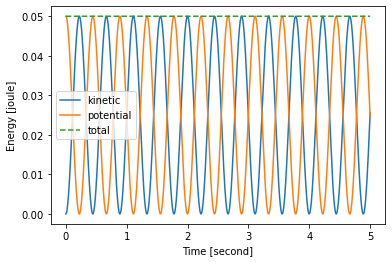

In [7]:
plt.plot(times, kinetic_energy.in_units_of(unit.joule), label='kinetic')
plt.plot(times, potential_energy.in_units_of(unit.joule), label='potential')
plt.plot(times, total_energy.in_units_of(unit.joule), '--', label='total')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Energy [{}]'.format(unit.joule))
plt.legend()
plt.show()

### La partícula en el pozo armónico tridimensional

La extensión del caso anterior a un espacio trimensional es inmediato. Para no hacerlo reiterativo, veremos en esta sección la descripción del oscilador harmónico desde la descripción de su potencial.

Como sabemos, en mecánica clásica la fuerza es el efecto sobre el sistema de un potencial externo en una determinada posición del espacio. El sistema clásico, en presencia de un potencial externo, sufrirá una fuerza en la dirección y sentido dado por la disminución del potential y de magnitud proporcional a la pendiente de dicho potencial:

\begin{equation}
\vec{F}(x,y,z) = -\vec{\nabla} V(x,y,z)
\end{equation}

Donde el gradiente $\vec{\nabla}$ es un operador tal que:

\begin{equation}
\vec{\nabla} V(x,y,z) = \frac{\delta}{\delta x} V(x,y,z) \hat{x} + 
\frac{\delta}{\delta y} V(x,y,z) \hat{y}+ \frac{\delta}{\delta z} V(x,y,z) \hat{z}
\end{equation}

Así que, conociendo que la fuerza armónica que sufre una partícula en la posición $\vec{r}=(x,y,z)$ cuando la posición de equilibrio es $\vec{r}_{0}=(x_{0}, y_{0}, z{0})$ es:

\begin{equation}
\vec{F}(x,y,z) = -kx\hat{x} -ky\hat{y} - kz\hat{z}
\end{equation}

No nos sorprenderá que el potencial armónico en tres dimensiones venga expresado por la expresión:

\begin{equation}
V(x,y,z) = \frac{1}{2} k (x^{2})
\end{equation}

## ¿Por qué es tan importante este modelo? ¿Para qué me sirve?

Muchos sistemas físicos pueden ser modelados por un oscilador armónico simple. Pero específicamente cuando nos referimos al modelado y simulación de sistemas moleculares, usamos el potencial armónico en los siguientes casos:

- Para modelar la interacción entre dos átomos enlazados covalentemente
- Para añadir al modelo de un sistema molecular un potencial externo a un átomo o conjuntos de átomos, o a un centro de masas, como restricción al movimiento (para anclar átomos).
- Para añadir al modelo de un sistema molecular un potencial interno entre dos átomos que 'fije' la distancia o la posición relativa entre ellos.
- Para aproximar las fluctuaciones de la geometría de una proteína entorno a una posición estable, a un mínimo, mediante los modos normales del potencial que describe la interacción entre sus átomos.

Además, hay un motivo impotante por el cual el potencial armónico están relevante en ciencia: cualquier función matemática se puede aproximar en un entorno lo suficientemente cercano a cualquiera de sus mínimos a una polinomio de segundo grado. Lo que dicho de otra manera, en un lenguaje más físico, significa que una partícula en **un entorno suficientemente próximo** de cualquier mínimo de cualquier potencial se comporta como si se encontrara en un potencial armónico. Es lo que podemos llamar como la harmonicidad de las pequeñas oscilaciones entorno al mínimo. ¿Por qué sucede esto?

Cualquier función matemática $f(x)$ puede ser aproximada, entorno a cualquier punto $x_{0}$, mediante la suma de infinitos sumandos conocida como expansión o serie de Taylor:

\begin{equation}
f(x_{0}+\Delta x) = f(x_{0}) + 
\left.\frac{d f(x)}{dx}\right\vert_{x_{0}}\Delta x +
\frac{1}{2!}\left.\frac{d^{2}f(x)}{dx^{2}}\right\vert_{x_{0}}\Delta x^{2} +
\frac{1}{3!}\left.\frac{d^{3}f(x)}{dx^{3}}\right\vert_{x_{0}}\Delta x^{3} + ... +
\frac{1}{n!}\left.\frac{d^{n}f(x)}{dx^{n}}\right\vert_{x_{0}}\Delta x^{n} + ...
\end{equation}

Ahora, si el punto $x_{0}$ es un mínimo de la función, por definición la pendiente en ese punto es cero:

\begin{equation}
\left.\frac{d f(x)}{dx}\right\vert_{x_{0}} = 0
\end{equation}

Si además el entorno de $x_{0}$ en el que se pretende aproximar la función es lo suficientemente pequeño, $\Delta x \lll 1$, los términos $\Delta x^{n}$ son cada vez más pequeños cuanto más grande es $n$:

\begin{equation}
\Delta x^{2} \gg \Delta x^{3} \gg \Delta x^{4} \gg ... \gg \Delta x^{n} \gg ...
\end{equation}

Así que, **en un entorno suficientemente pequeño de un mínimo**, cualquier función puede ser aproximada por otra de segundo grado:

\begin{equation}
f(x_{0}+\Delta x) \approx f(x_{0}) + \frac{1}{2}\left.\frac{d^{2}f(x)}{dx^{2}}\right\vert_{x_{0}}\Delta x^{2}
\end{equation}

Y si dicha función matemática está describiendo un potencial, podemos entonces decir que la partícula se comporta en las proximidades de un mínimo como si estuviera en un potencial armónico cuya constante de rigidez $k$ toma el valor de la segunda derivada del potencial en el mínimo (curvatura del mínimo):

\begin{equation}
V(x_{0}+\Delta x) \approx V(x_{0}) + \frac{1}{2}\left.\frac{d^{2}V(x)}{dx^{2}}\right\vert_{x_{0}}\Delta x^{2}
\end{equation}

Así que la frecuencia angular de las pequeñas oscilaciones de una partícula de masa $m$ alrededor de la posición cualquier mínimo $x_{0}$ del potencial viene descrito por:

\begin{equation}
\omega = \sqrt{\frac{1}{m} \left.\frac{d^{2}V(x)}{dx^{2}}\right\vert_{x_{0}}}
\end{equation}

Nota este argumento es la base de la discusión de los modos normales.

Nota este argumento será muy util para determinar aproximadamente cuan grande puede ser el paso de tiempo de integración de la dinámica de cualquier sistema.

Pregunta: Se llama modos normales a los modos de vibración harmónica de un sistema al rededor de un mínimo de su potencial. En este sentido el comportamiento del sistema se puede describir mediante un conjunto de movimientos coperativos oscilatorios más rápidos o más lentos, según sea la curvatura del potencial en el mínimo. Dicho esto: ¿Tiene sentido hablar de modos normales de vibración si el sistema se encuentra en un punto que no es mínimo?

## La vibración del enlace covalente de la molécula diatómica CO

Uno de los sistemas moleculares más sencillos que podemos pensar es una molécula diatómica. Veamos como podemos construir un modelo clásico para la molécula de monoxico de carbono CO.

Si queremos un modelo que describa el comportamiento clásico de una molécula diatómica, dos átomos unidos covalentemente, no es otra cosa que un sistema de dos partículas con masa unidas por un muelle. 

In [11]:
mass_1 = 12.011 * unit.amu # masa de un átomo de C
mass_2 = 15.999 * unit.amu # masa de un átomo de O

A la longitud natural del muelle le daremos un valor igual a la longitud del enlace covalente, en este caso triple, resuelto experimentalmente: 1.128 angstroms [ccccbdb_nist_gob](https://cccbdb.nist.gov/exp2x.asp?casno=630080&charge=0) [wikipedia](https://en.wikipedia.org/wiki/Carbon_monoxide)

Ahora bien, ¿qué constante $k$, qué rigidez, le damos al muelle para que el sistema sea un buen modelo de la molécula diatómica?

La frecuencia natural $\nu$ de un muelle de constante $k$ con una masa en cada extremo es la misma que la de una partícula con la masa reducida $\mu$ en un potencial armónico del tipo $\frac{1}{2} k x^2$. Así que si podemos determinar experimentalmente la frecuencia $\nu$ de vibración del enlace covalente mediante por ejemplo espectroscopía de infrarrojos [] [ccccbdb_nist_gob](https://cccbdb.nist.gov/exp2x.asp?casno=630080&charge=0)  podemos determinar el valor adecuado de $k$ para el modelo:

\begin{equation}
\nu = \frac{1}{2\pi}\sqrt{\frac{k}{\mu}}
\end{equation}

En el caso del monóxico de carbono $CO$ sabemos que el número de onda $\hat\nu$ de absorción es $2143 cm^{-1}$, y se relaciona con la frecuencia mediante:

\begin{equation}
\hat\nu = \frac{1}{\lambda} = \frac{\nu}{c},
\end{equation}

donde $c$ es la velocidad de la luz y $\lambda$ la longitud de onda.

In [12]:
wavenumber = 2143 * unit.centimeters**(-1)
c = 299792458 * unit.meters/unit.seconds
freq = wavenumber * c

In [13]:
mu = (mass_1*mass_2)/(mass_1+mass_2)

In [14]:
k = (2*np.pi*freq)**2 * mu

In [15]:
k

Quantity(value=1.1179036681754611e+30, unit=dalton/(second**2))

Dado que 1 Dalton son 1.6605300000013E-27 kg, mejor expresamos $k$ en $kg/s^{2}$n o lo que es lo mismo, en $N/m$:

In [16]:
k = 1.6605300000013E-27 * k._value * unit.kilogram/unit.seconds**2
print(k.in_units_of(unit.newton/unit.meter))

1856.312578116852 N/m


Hemos ajustado así nuestro modelo de dos masas y un muelle para que este sistema oscile clásicamente con el mismo periodo de tiempo que encontramos experimentalmente para la molécula CO:

In [17]:
T=1/freq
print(T.in_units_of(unit.femtoseconds))

15.565286756796642 fs


Nota: Aun no lo sabes, pero más adelante te darás cuenta de con este ejemplo estamos ilustrando cómo podemos construir un campo de fuerzas para modelar las interacciones moleculares a todos los átomos ajustado a resultados experimentales.

### Referencias

Colthup, Norman B. “Encyclopedia of Physical Science and Technology (Third Edition).” Analytical Chemistry: Article Titles: I, 2003, 793–816. https://doi.org/10.1016/b0-12-227410-5/00340-9.

Introduction to molecular spectroscopy.
by Barrow, Gordon M. McGraw-Hill Inc.,US, 1962
ISBN 9780070859043 / 0070859043